<h1>Importações e configurações gerais</h1>

In [415]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import scipy.stats
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest

pd.set_option('display.max_columns', None)

<h1>Manipulações da base de dados</h1>

In [3]:
base = pd.read_csv(r'C:\Users\lucas\Desktop\Bases de Dados Estudos\Acesso a oportunidades\Base indicadores.csv', sep=';', decimal=',')

In [ ]:
base

In [ ]:
#Verificando contagem de valores para a variável TMIEM, onde foi identificado diversos valores não numéricos (inf)
base[base.columns[-1]].value_counts()

In [46]:
#Copiando o valor não numérico inf
inf = base[base.columns[-5]][1].copy()

In [49]:
#Criando uma coluna onde a métrica é transformada em intervalos
for i in range(8):
    base.loc[:, base.columns[-1 -2*i] + ' faixa'] = ['Menos de 15 min' if base[base.columns[-1 -2*i]][j] < 900 else 
                                                  'De 15 a 30 min' if base[base.columns[-1 -2*i]][j] < 1800 else
                                                  'De 30 a 45 min' if base[base.columns[-1 -2*i]][j] < 2700 else
                                                  'De 45 a 60 min' if base[base.columns[-1 -2*i]][j] < 3600 else
                                                  'De 1 hora a 1 hora e 15 min' if base[base.columns[-1 -2*i]][j] < 4500 else
                                                  'De 1 hora e 15 min a 1 hora e 30 min' if base[base.columns[-1 -2*i]][j] < 5400 else
                                                  'De 1 hora e 30 min a 1 hora e 45 min' if base[base.columns[-1 -2*i]][j] < 6300 else
                                                  'De 1 hora e 45 min a 2 horas' if base[base.columns[-1 -2*i]][j] < 5400 else
                                                  'Mais de 2 horas' for j in range(len(base))]

In [52]:
base.head()

,Unnamed: 0,id_municipio,id_grid_h3,geometria,modo_transporte,horario_pico,CMATT15,CMATQ15,CMATD15,CMAST15,CMASB15,CMASM15,CMASA15,CMAET15,CMAEI15,CMAEF15,CMAEM15,CMATT30,CMATQ30,CMATD30,CMAST30,CMASB30,CMASM30,CMASA30,CMAET30,CMAEI30,CMAEF30,CMAEM30,CMATT45,CMATQ45,CMATD45,CMAST45,CMASB45,CMASM45,CMASA45,CMAET45,CMAEI45,CMAEF45,CMAEM45,CMATT60,CMATQ60,CMATD60,CMAST60,CMASB60,CMASM60,CMASA60,CMAET60,CMAEI60,CMAEF60,CMAEM60,CMATT90,CMATQ90,CMATD90,CMAST90,CMASB90,CMASM90,CMASA90,CMAET90,CMAEI90,CMAEF90,CMAEM90,CMATT120,CMATQ120,CMATD120,CMAST120,CMASB120,CMASM120,CMASA120,CMAET120,CMAEI120,CMAEF120,CMAEM120,TMIST,TMISB,TMISM,TMISA,TMIET,TMIEI,TMIEF,TMIEM,TMIEM faixa,TMIEF faixa,TMIEI faixa,TMIET faixa,TMISA faixa,TMISM faixa,TMISB faixa,TMIST faixa
0,0,2304400,8980104e39bffff,"POLYGON((-38.5159009707906 -3.79453633590019, ...",caminhada,1,0.30,0.27,0.32,0.43,0.75,0.48,0.0,0.42,0.48,0.54,0.59,0.61,0.58,0.65,0.43,0.75,0.48,0.0,0.85,0.96,1.09,1.18,1.92,1.88,2.03,1.28,2.24,1.43,0.00,2.54,2.39,3.27,3.55,3.99,4.04,4.03,2.13,3.73,2.38,1.67,4.23,3.83,5.18,5.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.67,176.67,176.67,5855.00,1063.33,1400.00,1063.33,1063.33,De 15 a 30 min,De 15 a 30 min,De 15 a 30 min,De 15 a 30 min,De 1 hora e 30 min a 1 hora e 45 min,Menos de 15 min,Menos de 15 min,Menos de 15 min
1,1,2304400,8980104e38bffff,"POLYGON((-38.5158514450582 -3.79109858942131, ...",caminhada,1,0.30,0.32,0.32,0.43,0.75,0.48,0.0,0.42,0.00,0.54,1.18,0.58,0.62,0.62,0.43,0.75,0.48,0.0,1.06,0.96,1.36,1.78,1.99,2.02,2.02,0.85,1.49,0.95,0.00,2.75,2.87,3.54,4.14,3.76,3.85,3.85,2.13,3.73,2.38,0.00,4.23,3.83,5.18,6.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,890.00,890.00,890.00,inf,1418.33,1943.33,1418.33,1418.33,De 15 a 30 min,De 15 a 30 min,De 30 a 45 min,De 15 a 30 min,Mais de 2 horas,Menos de 15 min,Menos de 15 min,Menos de 15 min
2,2,2304400,8980104e393ffff,"POLYGON((-38.5189042035777 -3.79620998096178, ...",caminhada,1,0.31,0.33,0.33,0.43,0.75,0.48,0.0,0.42,0.48,0.54,0.59,0.65,0.69,0.69,0.43,0.75,0.48,0.0,1.27,1.44,1.63,1.78,1.93,1.96,1.96,1.28,2.24,1.43,0.00,2.33,1.91,3.00,3.55,3.70,3.81,3.81,1.70,2.99,1.90,1.67,3.81,3.35,4.63,5.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1058.33,1058.33,1058.33,5661.67,140.00,1116.67,140.00,140.00,Menos de 15 min,Menos de 15 min,De 15 a 30 min,Menos de 15 min,De 1 hora e 30 min a 1 hora e 45 min,De 15 a 30 min,De 15 a 30 min,De 15 a 30 min
3,3,2304400,8980104e067ffff,"POLYGON((-38.5159504969996 -3.7979740880962, -...",caminhada,1,0.13,0.11,0.11,0.43,0.75,0.48,0.0,0.42,0.48,0.54,0.59,0.89,0.84,0.84,0.43,0.75,0.48,0.0,0.85,0.96,1.09,1.18,2.18,2.13,2.13,1.28,2.24,1.43,0.00,2.54,1.91,3.00,4.14,4.97,5.06,5.06,1.70,2.99,1.90,1.67,4.23,3.35,5.18,6.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,966.67,966.67,966.67,5448.33,1016.67,1353.33,1016.67,1016.67,De 15 a 30 min,De 15 a 30 min,De 15 a 30 min,De 15 a 30 min,De 1 hora e 30 min a 1 hora e 45 min,De 15 a 30 min,De 15 a 30 min,De 15 a 30 min
4,4,2304400,8980104e06fffff,"POLYGON((-38.5129472825962 -3.79630043109399, ...",bicicleta,1,1.16,1.10,1.10,0.43,0.75,0.48,0.0,1.90,1.91,2.45,2.96,9.13,8.89,8.89,8.94,11.19,9.05,10.0,10.57,10.53,12.26,11.24,47.45,47.78,47.78,40.00,38.06,40.48,41.67,31.50,32.06,30.79,33.14,83.60,84.30,84.30,72.77,65.67,74.29,90.00,56.45,53.59,53.95,62.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,486.67,486.67,486.67,2135.00,651.67,793.33,651.67,651.67,Menos de 15 min,Menos de 15 min,Menos de 15 min,Menos de 15 min,De 30 a 45 min,Menos de 15 min,Menos de 15 min,Menos de 15 min


In [53]:
# Substituindo os valores inf por 72001 para realizar transformações (devido à regra de negócio, todas as entradas maiores que 2h ou 72000s recebem valor inf)
base.replace(inf, 72001, inplace=True)

In [55]:
base.head()

,Unnamed: 0,id_municipio,id_grid_h3,geometria,modo_transporte,horario_pico,CMATT15,CMATQ15,CMATD15,CMAST15,CMASB15,CMASM15,CMASA15,CMAET15,CMAEI15,CMAEF15,CMAEM15,CMATT30,CMATQ30,CMATD30,CMAST30,CMASB30,CMASM30,CMASA30,CMAET30,CMAEI30,CMAEF30,CMAEM30,CMATT45,CMATQ45,CMATD45,CMAST45,CMASB45,CMASM45,CMASA45,CMAET45,CMAEI45,CMAEF45,CMAEM45,CMATT60,CMATQ60,CMATD60,CMAST60,CMASB60,CMASM60,CMASA60,CMAET60,CMAEI60,CMAEF60,CMAEM60,CMATT90,CMATQ90,CMATD90,CMAST90,CMASB90,CMASM90,CMASA90,CMAET90,CMAEI90,CMAEF90,CMAEM90,CMATT120,CMATQ120,CMATD120,CMAST120,CMASB120,CMASM120,CMASA120,CMAET120,CMAEI120,CMAEF120,CMAEM120,TMIST,TMISB,TMISM,TMISA,TMIET,TMIEI,TMIEF,TMIEM,TMIEM faixa,TMIEF faixa,TMIEI faixa,TMIET faixa,TMISA faixa,TMISM faixa,TMISB faixa,TMIST faixa
0,0,2304400,8980104e39bffff,"POLYGON((-38.5159009707906 -3.79453633590019, ...",caminhada,1,0.30,0.27,0.32,0.43,0.75,0.48,0.0,0.42,0.48,0.54,0.59,0.61,0.58,0.65,0.43,0.75,0.48,0.0,0.85,0.96,1.09,1.18,1.92,1.88,2.03,1.28,2.24,1.43,0.00,2.54,2.39,3.27,3.55,3.99,4.04,4.03,2.13,3.73,2.38,1.67,4.23,3.83,5.18,5.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.67,176.67,176.67,5855.00,1063.33,1400.00,1063.33,1063.33,De 15 a 30 min,De 15 a 30 min,De 15 a 30 min,De 15 a 30 min,De 1 hora e 30 min a 1 hora e 45 min,Menos de 15 min,Menos de 15 min,Menos de 15 min
1,1,2304400,8980104e38bffff,"POLYGON((-38.5158514450582 -3.79109858942131, ...",caminhada,1,0.30,0.32,0.32,0.43,0.75,0.48,0.0,0.42,0.00,0.54,1.18,0.58,0.62,0.62,0.43,0.75,0.48,0.0,1.06,0.96,1.36,1.78,1.99,2.02,2.02,0.85,1.49,0.95,0.00,2.75,2.87,3.54,4.14,3.76,3.85,3.85,2.13,3.73,2.38,0.00,4.23,3.83,5.18,6.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,890.00,890.00,890.00,72001.00,1418.33,1943.33,1418.33,1418.33,De 15 a 30 min,De 15 a 30 min,De 30 a 45 min,De 15 a 30 min,Mais de 2 horas,Menos de 15 min,Menos de 15 min,Menos de 15 min
2,2,2304400,8980104e393ffff,"POLYGON((-38.5189042035777 -3.79620998096178, ...",caminhada,1,0.31,0.33,0.33,0.43,0.75,0.48,0.0,0.42,0.48,0.54,0.59,0.65,0.69,0.69,0.43,0.75,0.48,0.0,1.27,1.44,1.63,1.78,1.93,1.96,1.96,1.28,2.24,1.43,0.00,2.33,1.91,3.00,3.55,3.70,3.81,3.81,1.70,2.99,1.90,1.67,3.81,3.35,4.63,5.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1058.33,1058.33,1058.33,5661.67,140.00,1116.67,140.00,140.00,Menos de 15 min,Menos de 15 min,De 15 a 30 min,Menos de 15 min,De 1 hora e 30 min a 1 hora e 45 min,De 15 a 30 min,De 15 a 30 min,De 15 a 30 min
3,3,2304400,8980104e067ffff,"POLYGON((-38.5159504969996 -3.7979740880962, -...",caminhada,1,0.13,0.11,0.11,0.43,0.75,0.48,0.0,0.42,0.48,0.54,0.59,0.89,0.84,0.84,0.43,0.75,0.48,0.0,0.85,0.96,1.09,1.18,2.18,2.13,2.13,1.28,2.24,1.43,0.00,2.54,1.91,3.00,4.14,4.97,5.06,5.06,1.70,2.99,1.90,1.67,4.23,3.35,5.18,6.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,966.67,966.67,966.67,5448.33,1016.67,1353.33,1016.67,1016.67,De 15 a 30 min,De 15 a 30 min,De 15 a 30 min,De 15 a 30 min,De 1 hora e 30 min a 1 hora e 45 min,De 15 a 30 min,De 15 a 30 min,De 15 a 30 min
4,4,2304400,8980104e06fffff,"POLYGON((-38.5129472825962 -3.79630043109399, ...",bicicleta,1,1.16,1.10,1.10,0.43,0.75,0.48,0.0,1.90,1.91,2.45,2.96,9.13,8.89,8.89,8.94,11.19,9.05,10.0,10.57,10.53,12.26,11.24,47.45,47.78,47.78,40.00,38.06,40.48,41.67,31.50,32.06,30.79,33.14,83.60,84.30,84.30,72.77,65.67,74.29,90.00,56.45,53.59,53.95,62.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,486.67,486.67,486.67,2135.00,651.67,793.33,651.67,651.67,Menos de 15 min,Menos de 15 min,Menos de 15 min,Menos de 15 min,De 30 a 45 min,Menos de 15 min,Menos de 15 min,Menos de 15 min


In [56]:
# Adicionando novas colunas
cols = list(base.columns.values)

for i in range(15):
    cols.pop(cols.index(base.columns[-1 -i]))


In [58]:
# Adicionando novas colunas
base = base[cols+['TMIST faixa', 'TMISB', 'TMISB faixa', 'TMISM', 'TMISM faixa', 'TMISA', 'TMISA faixa', 'TMIET', 'TMIET faixa', 'TMIEI', 'TMIEI faixa', 'TMIEF', 'TMIEF faixa', 'TMIEM', 'TMIEM faixa']]

In [59]:
base.head()

,Unnamed: 0,id_municipio,id_grid_h3,geometria,modo_transporte,horario_pico,CMATT15,CMATQ15,CMATD15,CMAST15,CMASB15,CMASM15,CMASA15,CMAET15,CMAEI15,CMAEF15,CMAEM15,CMATT30,CMATQ30,CMATD30,CMAST30,CMASB30,CMASM30,CMASA30,CMAET30,CMAEI30,CMAEF30,CMAEM30,CMATT45,CMATQ45,CMATD45,CMAST45,CMASB45,CMASM45,CMASA45,CMAET45,CMAEI45,CMAEF45,CMAEM45,CMATT60,CMATQ60,CMATD60,CMAST60,CMASB60,CMASM60,CMASA60,CMAET60,CMAEI60,CMAEF60,CMAEM60,CMATT90,CMATQ90,CMATD90,CMAST90,CMASB90,CMASM90,CMASA90,CMAET90,CMAEI90,CMAEF90,CMAEM90,CMATT120,CMATQ120,CMATD120,CMAST120,CMASB120,CMASM120,CMASA120,CMAET120,CMAEI120,CMAEF120,CMAEM120,TMIST,TMIST faixa,TMISB,TMISB faixa,TMISM,TMISM faixa,TMISA,TMISA faixa,TMIET,TMIET faixa,TMIEI,TMIEI faixa,TMIEF,TMIEF faixa,TMIEM,TMIEM faixa
0,0,2304400,8980104e39bffff,"POLYGON((-38.5159009707906 -3.79453633590019, ...",caminhada,1,0.30,0.27,0.32,0.43,0.75,0.48,0.0,0.42,0.48,0.54,0.59,0.61,0.58,0.65,0.43,0.75,0.48,0.0,0.85,0.96,1.09,1.18,1.92,1.88,2.03,1.28,2.24,1.43,0.00,2.54,2.39,3.27,3.55,3.99,4.04,4.03,2.13,3.73,2.38,1.67,4.23,3.83,5.18,5.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.67,Menos de 15 min,176.67,Menos de 15 min,176.67,Menos de 15 min,5855.00,De 1 hora e 30 min a 1 hora e 45 min,1063.33,De 15 a 30 min,1400.00,De 15 a 30 min,1063.33,De 15 a 30 min,1063.33,De 15 a 30 min
1,1,2304400,8980104e38bffff,"POLYGON((-38.5158514450582 -3.79109858942131, ...",caminhada,1,0.30,0.32,0.32,0.43,0.75,0.48,0.0,0.42,0.00,0.54,1.18,0.58,0.62,0.62,0.43,0.75,0.48,0.0,1.06,0.96,1.36,1.78,1.99,2.02,2.02,0.85,1.49,0.95,0.00,2.75,2.87,3.54,4.14,3.76,3.85,3.85,2.13,3.73,2.38,0.00,4.23,3.83,5.18,6.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,890.00,Menos de 15 min,890.00,Menos de 15 min,890.00,Menos de 15 min,72001.00,Mais de 2 horas,1418.33,De 15 a 30 min,1943.33,De 30 a 45 min,1418.33,De 15 a 30 min,1418.33,De 15 a 30 min
2,2,2304400,8980104e393ffff,"POLYGON((-38.5189042035777 -3.79620998096178, ...",caminhada,1,0.31,0.33,0.33,0.43,0.75,0.48,0.0,0.42,0.48,0.54,0.59,0.65,0.69,0.69,0.43,0.75,0.48,0.0,1.27,1.44,1.63,1.78,1.93,1.96,1.96,1.28,2.24,1.43,0.00,2.33,1.91,3.00,3.55,3.70,3.81,3.81,1.70,2.99,1.90,1.67,3.81,3.35,4.63,5.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1058.33,De 15 a 30 min,1058.33,De 15 a 30 min,1058.33,De 15 a 30 min,5661.67,De 1 hora e 30 min a 1 hora e 45 min,140.00,Menos de 15 min,1116.67,De 15 a 30 min,140.00,Menos de 15 min,140.00,Menos de 15 min
3,3,2304400,8980104e067ffff,"POLYGON((-38.5159504969996 -3.7979740880962, -...",caminhada,1,0.13,0.11,0.11,0.43,0.75,0.48,0.0,0.42,0.48,0.54,0.59,0.89,0.84,0.84,0.43,0.75,0.48,0.0,0.85,0.96,1.09,1.18,2.18,2.13,2.13,1.28,2.24,1.43,0.00,2.54,1.91,3.00,4.14,4.97,5.06,5.06,1.70,2.99,1.90,1.67,4.23,3.35,5.18,6.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,966.67,De 15 a 30 min,966.67,De 15 a 30 min,966.67,De 15 a 30 min,5448.33,De 1 hora e 30 min a 1 hora e 45 min,1016.67,De 15 a 30 min,1353.33,De 15 a 30 min,1016.67,De 15 a 30 min,1016.67,De 15 a 30 min
4,4,2304400,8980104e06fffff,"POLYGON((-38.5129472825962 -3.79630043109399, ...",bicicleta,1,1.16,1.10,1.10,0.43,0.75,0.48,0.0,1.90,1.91,2.45,2.96,9.13,8.89,8.89,8.94,11.19,9.05,10.0,10.57,10.53,12.26,11.24,47.45,47.78,47.78,40.00,38.06,40.48,41.67,31.50,32.06,30.79,33.14,83.60,84.30,84.30,72.77,65.67,74.29,90.00,56.45,53.59,53.95,62.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,486.67,Menos de 15 min,486.67,Menos de 15 min,486.67,Menos de 15 min,2135.00,De 30 a 45 min,651.67,Menos de 15 min,793.33,Menos de 15 min,651.67,Menos de 15 min,651.67,Menos de 15 min


In [62]:
# Subindo nova base para análise

base_indicadores = base

In [63]:
base = pd.read_csv(r'C:\Users\lucas\Desktop\Bases de Dados Estudos\Acesso a oportunidades\Base_corrigida.csv', sep=';', decimal=',')

In [69]:
base.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1, inplace = True)

In [72]:
base_indicadores = base_indicadores.copy()

In [73]:
base.head()

,id_municipio,id_grid_h3,geometria,quantidade_pessoas,quantidade_pessoas_brancas,quantidade_pessoas_negras,quantidade_pessoas_indigenas,quantidade_pessoas_amarelas,renda_domiciliar_pc,quintil_de_renda,decil_de_renda,quantidade_estabelecimentos_ensino,quantidade_estabelecimentos_ensino_infantil,quantidade_estabelecimentos_ensino_fundamental,quantidade_estabelecimentos_ensino_medio,quantidade_estabelecimentos_saude,quantidade_estabelecimentos_saude_baixa_complexidade,quantidade_estabelecimentos_saude_media_coplexidade,quantidade_estabelecimentos_saude_alta_coplexidade,Maioria populacional,Proporção pessoas brancas,Proporção pessoas negras,Proporção pessoas indigenas,Proporção pessoas amarelas,Variação percentual em relação à renda domiciliar pc média do município,Possuí estabelecimento de ensino?,Possuí estabelecimento de ensino infantil?,Possuí estabelecimento de ensino fundamental?,Possuí estabelecimento de ensino médio?,Possuí estabelecimento de saúde?,Possuí estabelecimento de saúde de baixa complexidade?,Possuí estabelecimento de saúde de média complexidade?,Possuí estabelecimento de saúde de alta complexidade?
0,2304400,8980104e383ffff,"POLYGON((-38.5188546631227 -3.79277222097549, ...",3,1,2,0,0,284.6,NaN,NaN,0,0,0,0,0,0,0,0,Maioria não branca,0.333333,0.666667,0.000000,0.000000,-0.599220,Não,Não,Não,Não,Não,Não,Não,Não
1,2304400,8980104e39bffff,"POLYGON((-38.5159009707906 -3.79453633590019, ...",1132,305,825,0,2,419.5,NaN,NaN,0,0,0,0,1,1,1,0,Maioria não branca,0.269435,0.728799,0.000000,0.001767,-0.409251,Não,Não,Não,Não,Sim,Sim,Sim,Não
2,2304400,8980104e38bffff,"POLYGON((-38.5158514450582 -3.79109858942131, ...",562,146,409,0,7,265.1,NaN,NaN,0,0,0,0,0,0,0,0,Maioria não branca,0.259786,0.727758,0.000000,0.012456,-0.626680,Não,Não,Não,Não,Não,Não,Não,Não
3,2304400,8980104e38fffff,"POLYGON((-38.5188051231444 -3.78933446671875, ...",1414,538,858,2,15,388.0,NaN,NaN,0,0,0,0,0,0,0,0,Maioria não branca,0.380481,0.606789,0.001414,0.010608,-0.453610,Não,Não,Não,Não,Não,Não,Não,Não
4,2304400,8980104e387ffff,"POLYGON((-38.5218083595766 -3.79100808633707, ...",1429,547,872,0,10,443.2,NaN,NaN,0,0,0,0,0,0,0,0,Maioria não branca,0.382785,0.610217,0.000000,0.006998,-0.375876,Não,Não,Não,Não,Não,Não,Não,Não


In [91]:
# Realizando merge entre as duas bases através da coluna "id_grid_h3" (localização) para obter qual a maioria populacional

base_indicadores = pd.merge(base_indicadores, base[['id_grid_h3', 'Maioria populacional']], how='left', left_on = ['id_grid_h3'], right_on = ['id_grid_h3'])

In [92]:
base_indicadores.head()

,id_municipio,id_grid_h3,geometria,modo_transporte,horario_pico,CMATT15,CMATQ15,CMATD15,CMAST15,CMASB15,CMASM15,CMASA15,CMAET15,CMAEI15,CMAEF15,CMAEM15,CMATT30,CMATQ30,CMATD30,CMAST30,CMASB30,CMASM30,CMASA30,CMAET30,CMAEI30,CMAEF30,CMAEM30,CMATT45,CMATQ45,CMATD45,CMAST45,CMASB45,CMASM45,CMASA45,CMAET45,CMAEI45,CMAEF45,CMAEM45,CMATT60,CMATQ60,CMATD60,CMAST60,CMASB60,CMASM60,CMASA60,CMAET60,CMAEI60,CMAEF60,CMAEM60,CMATT90,CMATQ90,CMATD90,CMAST90,CMASB90,CMASM90,CMASA90,CMAET90,CMAEI90,CMAEF90,CMAEM90,CMATT120,CMATQ120,CMATD120,CMAST120,CMASB120,CMASM120,CMASA120,CMAET120,CMAEI120,CMAEF120,CMAEM120,TMIST,TMIST faixa,TMISB,TMISB faixa,TMISM,TMISM faixa,TMISA,TMISA faixa,TMIET,TMIET faixa,TMIEI,TMIEI faixa,TMIEF,TMIEF faixa,TMIEM,TMIEM faixa,Maioria populacional
0,2304400,8980104e39bffff,"POLYGON((-38.5159009707906 -3.79453633590019, ...",caminhada,1,0.30,0.27,0.32,0.43,0.75,0.48,0.0,0.42,0.48,0.54,0.59,0.61,0.58,0.65,0.43,0.75,0.48,0.0,0.85,0.96,1.09,1.18,1.92,1.88,2.03,1.28,2.24,1.43,0.00,2.54,2.39,3.27,3.55,3.99,4.04,4.03,2.13,3.73,2.38,1.67,4.23,3.83,5.18,5.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.67,Menos de 15 min,176.67,Menos de 15 min,176.67,Menos de 15 min,5855.00,De 1 hora e 30 min a 1 hora e 45 min,1063.33,De 15 a 30 min,1400.00,De 15 a 30 min,1063.33,De 15 a 30 min,1063.33,De 15 a 30 min,Maioria não branca
1,2304400,8980104e38bffff,"POLYGON((-38.5158514450582 -3.79109858942131, ...",caminhada,1,0.30,0.32,0.32,0.43,0.75,0.48,0.0,0.42,0.00,0.54,1.18,0.58,0.62,0.62,0.43,0.75,0.48,0.0,1.06,0.96,1.36,1.78,1.99,2.02,2.02,0.85,1.49,0.95,0.00,2.75,2.87,3.54,4.14,3.76,3.85,3.85,2.13,3.73,2.38,0.00,4.23,3.83,5.18,6.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,890.00,Menos de 15 min,890.00,Menos de 15 min,890.00,Menos de 15 min,72001.00,Mais de 2 horas,1418.33,De 15 a 30 min,1943.33,De 30 a 45 min,1418.33,De 15 a 30 min,1418.33,De 15 a 30 min,Maioria não branca
2,2304400,8980104e393ffff,"POLYGON((-38.5189042035777 -3.79620998096178, ...",caminhada,1,0.31,0.33,0.33,0.43,0.75,0.48,0.0,0.42,0.48,0.54,0.59,0.65,0.69,0.69,0.43,0.75,0.48,0.0,1.27,1.44,1.63,1.78,1.93,1.96,1.96,1.28,2.24,1.43,0.00,2.33,1.91,3.00,3.55,3.70,3.81,3.81,1.70,2.99,1.90,1.67,3.81,3.35,4.63,5.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1058.33,De 15 a 30 min,1058.33,De 15 a 30 min,1058.33,De 15 a 30 min,5661.67,De 1 hora e 30 min a 1 hora e 45 min,140.00,Menos de 15 min,1116.67,De 15 a 30 min,140.00,Menos de 15 min,140.00,Menos de 15 min,Área não habitada
3,2304400,8980104e067ffff,"POLYGON((-38.5159504969996 -3.7979740880962, -...",caminhada,1,0.13,0.11,0.11,0.43,0.75,0.48,0.0,0.42,0.48,0.54,0.59,0.89,0.84,0.84,0.43,0.75,0.48,0.0,0.85,0.96,1.09,1.18,2.18,2.13,2.13,1.28,2.24,1.43,0.00,2.54,1.91,3.00,4.14,4.97,5.06,5.06,1.70,2.99,1.90,1.67,4.23,3.35,5.18,6.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,966.67,De 15 a 30 min,966.67,De 15 a 30 min,966.67,De 15 a 30 min,5448.33,De 1 hora e 30 min a 1 hora e 45 min,1016.67,De 15 a 30 min,1353.33,De 15 a 30 min,1016.67,De 15 a 30 min,1016.67,De 15 a 30 min,Maioria não branca
4,2304400,8980104e06fffff,"POLYGON((-38.5129472825962 -3.79630043109399, ...",bicicleta,1,1.16,1.10,1.10,0.43,0.75,0.48,0.0,1.90,1.91,2.45,2.96,9.13,8.89,8.89,8.94,11.19,9.05,10.0,10.57,10.53,12.26,11.24,47.45,47.78,47.78,40.00,38.06,40.48,41.67,31.50,32.06,30.79,33.14,83.60,84.30,84.30,72.77,65.67,74.29,90.00,56.45,53.59,53.95,62.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,486.67,Menos de 15 min,486.67,Menos de 15 min,486.67,Menos de 15 min,2135.00,De 30 a 45 min,651.67,Menos de 15 min,793.33,Menos de 15 min,651.67,Menos de 15 min,651.67,Menos de 15 min,Maioria não branca


In [94]:
# Renomeando os valoresd na coluna modo_transporte para facilitar a análise

base_indicadores.loc[:, 'modo_transporte 2'] = ['transporte público - horário de pico' if ((base_indicadores['modo_transporte'][i] == 'tp') & (base_indicadores['horario_pico'][i] == 1)) else 
                                                'transporte público' if (base_indicadores['modo_transporte'][i] == 'tp') else 
                                                base_indicadores['modo_transporte'][i] 
                                                for i in range(len(base_indicadores))]

In [107]:
base_indicadores.loc[:, 'modo_transporte'] = base_indicadores['modo_transporte 2'].copy()

In [108]:
base_indicadores.drop('modo_transporte 2', axis = 1, inplace = True)

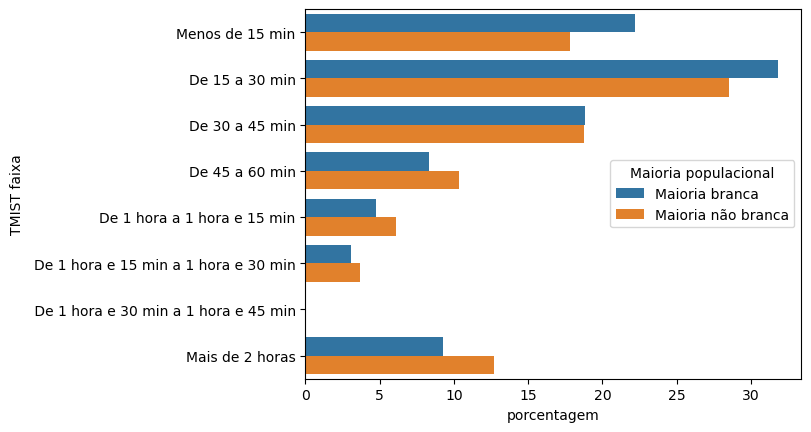

In [154]:
# Plotando um gráfico de barras para verificar a diferença na métrica entre as categorias de maioria populacional

sns.barplot(data = base_indicadores[(base_indicadores['modo_transporte'] == 'caminhada') & (base_indicadores['Maioria populacional'] != 'Área não habitada')].groupby('Maioria populacional')['TMIST faixa'].value_counts(normalize=True).mul(100).rename('porcentagem').reset_index(), 
            y = 'TMIST faixa', x = 'porcentagem', hue = 'Maioria populacional', orient = 'h', 
            order = ['Menos de 15 min', 'De 15 a 30 min', 'De 30 a 45 min', 'De 45 a 60 min', 'De 1 hora a 1 hora e 15 min', 'De 1 hora e 15 min a 1 hora e 30 min', ' De 1 hora e 30 min a 1 hora e 45 min', 'Mais de 2 horas'])
plt.show()

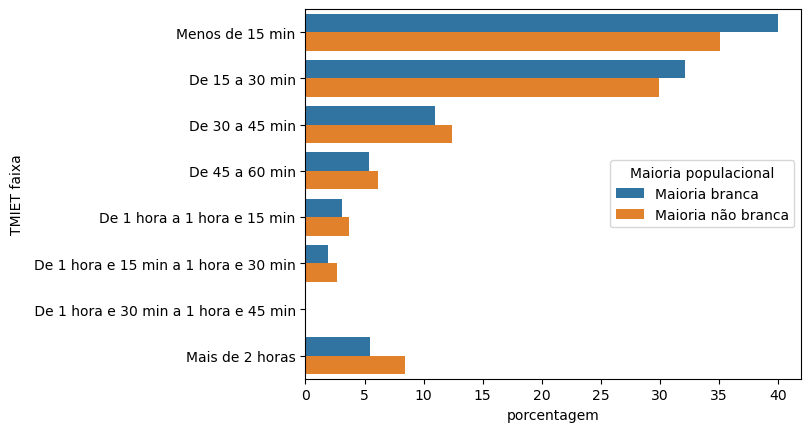

In [156]:
sns.barplot(data = base_indicadores[(base_indicadores['modo_transporte'] == 'caminhada') & (base_indicadores['Maioria populacional'] != 'Área não habitada')].groupby('Maioria populacional')['TMIET faixa'].value_counts(normalize=True).mul(100).rename('porcentagem').reset_index(), 
            y = 'TMIET faixa', x = 'porcentagem', hue = 'Maioria populacional', orient = 'h', 
            order = ['Menos de 15 min', 'De 15 a 30 min', 'De 30 a 45 min', 'De 45 a 60 min', 'De 1 hora a 1 hora e 15 min', 'De 1 hora e 15 min a 1 hora e 30 min', ' De 1 hora e 30 min a 1 hora e 45 min', 'Mais de 2 horas'])
plt.show()

In [157]:
base_indicadores.to_csv(r'C:\Users\lucas\Desktop\Bases de Dados Estudos\Acesso a oportunidades\Base indicadores corrigida.csv', sep=';', decimal=',')

In [158]:
base.loc[:, 'Maioria populacional'] = [ 'Área não habitada' if ((base['quantidade_pessoas_brancas'][i] + base['quantidade_pessoas_negras'][i] + base['quantidade_pessoas_indigenas'][i] + base['quantidade_pessoas_amarelas'][i]) == 0) else
                                       'Maioria branca' if (base['quantidade_pessoas_negras'][i] + base['quantidade_pessoas_indigenas'][i] + base['quantidade_pessoas_amarelas'][i]) < base['quantidade_pessoas_brancas'][i] else
                                       'Maioria não branca'
                                       for i in range(len(base))]

In [161]:
base.loc[:, 'Proporção pessoas brancas'] = [0 if base['Maioria populacional'][i] == 'Área não habitada' else 
                                            base['quantidade_pessoas_brancas'][i]/(base['quantidade_pessoas_brancas'][i] + base['quantidade_pessoas_negras'][i] + base['quantidade_pessoas_indigenas'][i] + base['quantidade_pessoas_amarelas'][i]) 
                                            for i in range(len(base))]

base.loc[:, 'Proporção pessoas negras'] = [0 if base['Maioria populacional'][i] == 'Área não habitada' else 
                                           base['quantidade_pessoas_negras'][i]/(base['quantidade_pessoas_brancas'][i] + base['quantidade_pessoas_negras'][i] + base['quantidade_pessoas_indigenas'][i] + base['quantidade_pessoas_amarelas'][i]) 
                                           for i in range(len(base))]

base.loc[:, 'Proporção pessoas amarelas'] = [0 if base['Maioria populacional'][i] == 'Área não habitada' else
                                             base['quantidade_pessoas_amarelas'][i]/(base['quantidade_pessoas_brancas'][i] + base['quantidade_pessoas_negras'][i] + base['quantidade_pessoas_indigenas'][i] + base['quantidade_pessoas_amarelas'][i]) 
                                             for i in range(len(base))]

base.loc[:, 'Proporção pessoas indigenas'] = [0 if base['Maioria populacional'][i] == 'Área não habitada' else 
                                              base['quantidade_pessoas_indigenas'][i]/(base['quantidade_pessoas_brancas'][i] + base['quantidade_pessoas_negras'][i] + base['quantidade_pessoas_indigenas'][i] + base['quantidade_pessoas_amarelas'][i]) 
                                              for i in range(len(base))]

In [259]:
base.loc[:, 'id'] = [str(base['id_municipio'][i]) + str(base['id_grid_h3'][i]) for i in range(len(base))]

In [260]:
base_indicadores.loc[:, 'id'] = [str(base_indicadores['id_municipio'][i]) + str(base_indicadores['id_grid_h3'][i]) for i in range(len(base_indicadores))]

In [261]:
base_indicadores = pd.merge(base_indicadores, base[['id', 'Proporção pessoas brancas']], how='left', left_on = ['id'], right_on = ['id'])

In [265]:
base_indicadores.drop(['Maioria populacional'], axis = 1, inplace = True)

In [266]:
base_indicadores = pd.merge(base_indicadores, base[['id', 'Maioria populacional']], how='left', left_on = ['id'], right_on = ['id'])

<h1>Lista de colunas das bases de dados</h1>

In [267]:
# Listando as colunas da base de dados para verificar quando necessário

base.columns

Index(['id_municipio', 'id_grid_h3', 'geometria', 'quantidade_pessoas',
       'quantidade_pessoas_brancas', 'quantidade_pessoas_negras',
       'quantidade_pessoas_indigenas', 'quantidade_pessoas_amarelas',
       'renda_domiciliar_pc', 'quintil_de_renda', 'decil_de_renda',
       'quantidade_estabelecimentos_ensino',
       'quantidade_estabelecimentos_ensino_infantil',
       'quantidade_estabelecimentos_ensino_fundamental',
       'quantidade_estabelecimentos_ensino_medio',
       'quantidade_estabelecimentos_saude',
       'quantidade_estabelecimentos_saude_baixa_complexidade',
       'quantidade_estabelecimentos_saude_media_coplexidade',
       'quantidade_estabelecimentos_saude_alta_coplexidade',
       'Maioria populacional', 'Proporção pessoas brancas',
       'Proporção pessoas negras', 'Proporção pessoas indigenas',
       'Proporção pessoas amarelas',
       'Variação percentual em relação à renda domiciliar pc média do município',
       'Possuí estabelecimento de ensino?'

In [268]:
base_indicadores.columns

Index(['id_municipio', 'id_grid_h3', 'geometria', 'modo_transporte',
       'horario_pico', 'CMATT15', 'CMATQ15', 'CMATD15', 'CMAST15', 'CMASB15',
       'CMASM15', 'CMASA15', 'CMAET15', 'CMAEI15', 'CMAEF15', 'CMAEM15',
       'CMATT30', 'CMATQ30', 'CMATD30', 'CMAST30', 'CMASB30', 'CMASM30',
       'CMASA30', 'CMAET30', 'CMAEI30', 'CMAEF30', 'CMAEM30', 'CMATT45',
       'CMATQ45', 'CMATD45', 'CMAST45', 'CMASB45', 'CMASM45', 'CMASA45',
       'CMAET45', 'CMAEI45', 'CMAEF45', 'CMAEM45', 'CMATT60', 'CMATQ60',
       'CMATD60', 'CMAST60', 'CMASB60', 'CMASM60', 'CMASA60', 'CMAET60',
       'CMAEI60', 'CMAEF60', 'CMAEM60', 'CMATT90', 'CMATQ90', 'CMATD90',
       'CMAST90', 'CMASB90', 'CMASM90', 'CMASA90', 'CMAET90', 'CMAEI90',
       'CMAEF90', 'CMAEM90', 'CMATT120', 'CMATQ120', 'CMATD120', 'CMAST120',
       'CMASB120', 'CMASM120', 'CMASA120', 'CMAET120', 'CMAEI120', 'CMAEF120',
       'CMAEM120', 'TMIST', 'TMIST faixa', 'TMISB', 'TMISB faixa', 'TMISM',
       'TMISM faixa', 'TMISA', 'TMISA

<h1>Regressões lineares</h1>

<h3> #1 - Renda domiciliar pc ~ Proporção pessoas brancas </h3>

In [322]:
base_1_99 = base[(base['Maioria populacional'] != 'Área não habitada') & (base['Proporção pessoas brancas'] != 0) & (base['Proporção pessoas brancas'] != 1)].nsmallest(round(len(base[(base['Maioria populacional'] != 'Área não habitada') & (base['Proporção pessoas brancas'] != 0) & (base['Proporção pessoas brancas'] != 1)])*0.99), 'renda_domiciliar_pc')

In [323]:
modelo_ajustado1 = sm.ols(formula = "renda_domiciliar_pc ~ Q('Proporção pessoas brancas')", data = base_1_99)
modelo_treinado1 = modelo_ajustado1.fit()
modelo_treinado1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     renda_domiciliar_pc   R-squared:                       0.358
Model:                             OLS   Adj. R-squared:                  0.358
Method:                  Least Squares   F-statistic:                 3.499e+04
Date:                 Wed, 25 Jan 2023   Prob (F-statistic):               0.00
Time:                         10:53:27   Log-Likelihood:            -5.0116e+05
No. Observations:                62747   AIC:                         1.002e+06
Df Residuals:                    62745   BIC:                         1.002e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       -350.5559      7.239    -48.426      0.000    -364.744    -336.368
Q('Proporção pessoas brancas')  2509.1969     13.414    187.059      0.000    2482.906    2535.488
==============================================================================
Omnibus:                    24145.583   Durbin-Watson:                   0.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           116518.159
Skew:                           1.829   Prob(JB):                         0.00
Kurtosis:                       8.584   Cond. No.                         5.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [324]:
previsoes1 = modelo_treinado1.predict({'Proporção pessoas brancas' :base_1_99['Proporção pessoas brancas']})

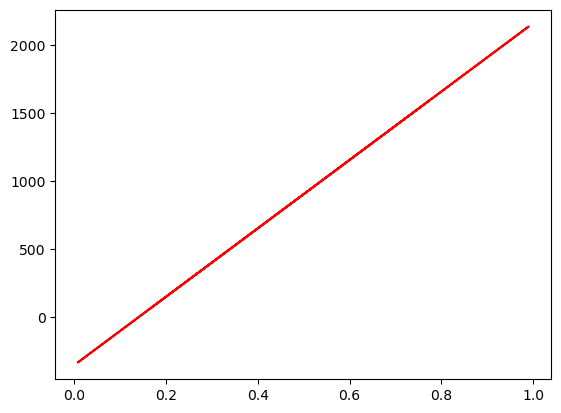

In [479]:
#plt.scatter(data = base_1_100, x = 'Proporção pessoas brancas', y = 'renda_domiciliar_pc', s = 1)
plt.plot(base_1_99['Proporção pessoas brancas'], previsoes1, color='red')
plt.show()

<h3> #2 - Variação percentual em relação à renda domiciliar pc média do município ~ Proporção pessoas brancas </h3>

In [232]:
base_2_99 = base[(base['Maioria populacional'] != 'Área não habitada') & (base['Proporção pessoas brancas'] != 0) & (base['Proporção pessoas brancas'] != 1)].nsmallest(round(len(base[(base['Maioria populacional'] != 'Área não habitada') & (base['Proporção pessoas brancas'] != 0) & (base['Proporção pessoas brancas'] != 1)])*0.99), 'Variação percentual em relação à renda domiciliar pc média do município')

In [233]:
modelo_ajustado2 = sm.ols(formula = "Q('Variação percentual em relação à renda domiciliar pc média do município') ~ Q('Proporção pessoas brancas')", data = base_2_99)
modelo_treinado2 = modelo_ajustado2.fit()
modelo_treinado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                         OLS Regression Results                                                         
========================================================================================================================================
Dep. Variable:     Q('Variação percentual em relação à renda domiciliar pc média do município')   R-squared:                       0.269
Model:                                                                                      OLS   Adj. R-squared:                  0.269
Method:                                                                           Least Squares   F-statistic:                 2.306e+04
Date:                                                                          Tue, 24 Jan 2023   Prob (F-statistic):               0.00
Time:                                                                                  20:31:21   Log-Likelihood:                -69840.
No. Observations:                                                                         62747   AIC:                         1.397e+05
Df Residuals:                                                                             62745   BIC:                         1.397e+05
Df Model:                                                                                     1                                         
Covariance Type:                                                                      nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -1.0960      0.007   -146.478      0.000      -1.111      -1.081
Q('Proporção pessoas brancas')     2.1034      0.014    151.863      0.000       2.076       2.131
==============================================================================
Omnibus:                    21554.653   Durbin-Watson:                   0.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82044.091
Skew:                           1.702   Prob(JB):                         0.00
Kurtosis:                       7.450   Cond. No.                         5.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
previsoes2 = modelo_treinado2.predict({'Proporção pessoas brancas' : base_2_99['Proporção pessoas brancas']})

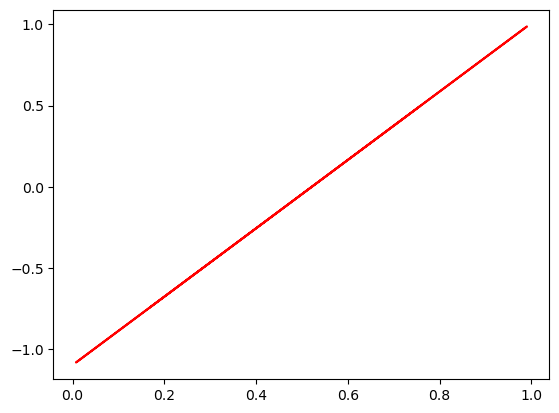

In [326]:
#plt.scatter(data = base_2_99, x = 'Proporção pessoas brancas', y = 'Variação percentual em relação à renda domiciliar pc média do município', s = 1)
plt.plot(base_2_99['Proporção pessoas brancas'], previsoes2, color='red')
plt.show()

<h3> #3 - Quantidade de estabelecimentos de ensino ~ Proporção pessoas brancas </h3>

In [254]:
base_3_99 = base[(base['Maioria populacional'] != 'Área não habitada') & (base['Proporção pessoas brancas'] != 0) & (base['Proporção pessoas brancas'] != 1)].nsmallest(round(len(base[(base['Maioria populacional'] != 'Área não habitada') & (base['Proporção pessoas brancas'] != 0) & (base['Proporção pessoas brancas'] != 1)])*0.99), 'quantidade_estabelecimentos_ensino')

In [249]:
modelo_ajustado3 = sm.ols(formula = "quantidade_estabelecimentos_ensino ~ Q('Proporção pessoas brancas')", data = base_3_99)
modelo_treinado3 = modelo_ajustado3.fit()
modelo_treinado3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     quantidade_estabelecimentos_ensino   R-squared:                       0.000
Model:                                            OLS   Adj. R-squared:                  0.000
Method:                                 Least Squares   F-statistic:                     10.58
Date:                                Wed, 25 Jan 2023   Prob (F-statistic):            0.00114
Time:                                        09:44:14   Log-Likelihood:                -34912.
No. Observations:                               62747   AIC:                         6.983e+04
Df Residuals:                                   62745   BIC:                         6.985e+04
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.1713      0.004     39.967      0.000       0.163       0.180
Q('Proporção pessoas brancas')    -0.0256      0.008     -3.252      0.001      -0.041      -0.010
==============================================================================
Omnibus:                    34324.696   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           202858.537
Skew:                           2.716   Prob(JB):                         0.00
Kurtosis:                       9.934   Cond. No.                         5.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [251]:
previsoes3 = modelo_treinado3.predict({'Proporção pessoas brancas' : base_3_99['Proporção pessoas brancas']})

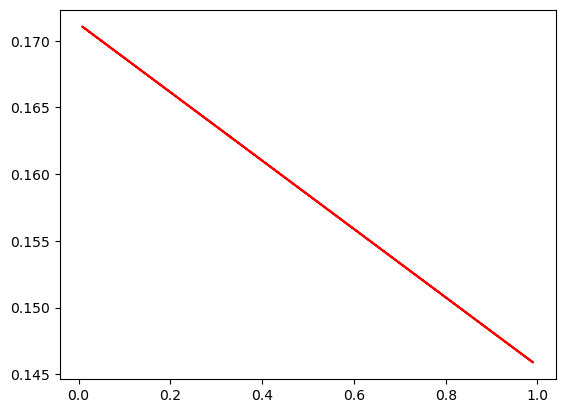

In [327]:
#plt.scatter(data = base_3_99, x = 'Proporção pessoas brancas', y = 'quantidade_estabelecimentos_ensino', s = 1)
plt.plot(base_3_99['Proporção pessoas brancas'], previsoes3, color='red')
plt.show()

<h3> #4 - Quantidade de estabelecimentos de saúde ~ Proporção pessoas brancas </h3>

In [255]:
base_4_99 = base[(base['Maioria populacional'] != 'Área não habitada') & (base['Proporção pessoas brancas'] != 0) & (base['Proporção pessoas brancas'] != 1)].nsmallest(round(len(base[(base['Maioria populacional'] != 'Área não habitada') & (base['Proporção pessoas brancas'] != 0) & (base['Proporção pessoas brancas'] != 1)])*0.99), 'quantidade_estabelecimentos_saude')

In [256]:
modelo_ajustado4 = sm.ols(formula = "quantidade_estabelecimentos_saude ~ Q('Proporção pessoas brancas')", data = base_4_99)
modelo_treinado4 = modelo_ajustado4.fit()
modelo_treinado4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     quantidade_estabelecimentos_saude   R-squared:                       0.000
Model:                                           OLS   Adj. R-squared:                 -0.000
Method:                                Least Squares   F-statistic:                    0.1036
Date:                               Wed, 25 Jan 2023   Prob (F-statistic):              0.747
Time:                                       09:49:02   Log-Likelihood:                 4117.2
No. Observations:                              62747   AIC:                            -8230.
Df Residuals:                                  62745   BIC:                            -8212.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.0550      0.002     23.907      0.000       0.050       0.059
Q('Proporção pessoas brancas')    -0.0014      0.004     -0.322      0.747      -0.010       0.007
==============================================================================
Omnibus:                    48885.623   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           636512.229
Skew:                           3.934   Prob(JB):                         0.00
Kurtosis:                      16.474   Cond. No.                         5.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [257]:
previsoes4 = modelo_treinado4.predict({'Proporção pessoas brancas' : base_4_99['Proporção pessoas brancas']})

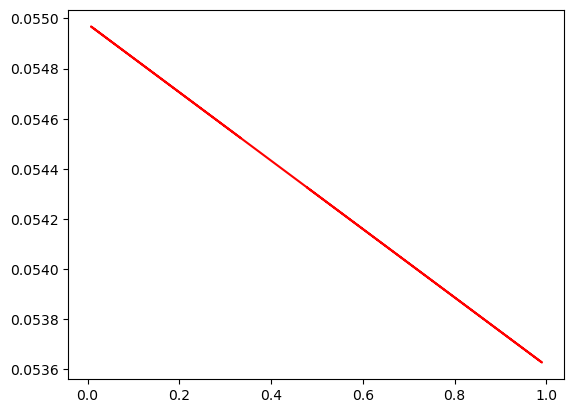

In [328]:
#plt.scatter(data = base_4_99, x = 'Proporção pessoas brancas', y = 'quantidade_estabelecimentos_saude', s = 1)
plt.plot(base_4_99['Proporção pessoas brancas'], previsoes4, color='red')
plt.show()

<h3> #5 - TMIST (caminhada) ~ Proporção pessoas brancas </h3>

In [278]:
base_5_100 = base_indicadores[(base_indicadores['Maioria populacional'] != 'Área não habitada') & (base_indicadores['Proporção pessoas brancas'] != 0) & (base_indicadores['Proporção pessoas brancas'] != 1) & (base_indicadores['modo_transporte'] == 'caminhada')].nsmallest(round(len(base_indicadores[(base_indicadores['Maioria populacional'] != 'Área não habitada') & (base_indicadores['Proporção pessoas brancas'] != 0) & (base_indicadores['Proporção pessoas brancas'] != 1) & (base_indicadores['modo_transporte'] == 'caminhada')])*1), 'TMIST')

In [279]:
modelo_ajustado5 = sm.ols(formula = "TMIST ~ Q('Proporção pessoas brancas')", data = base_5_100)
modelo_treinado5 = modelo_ajustado5.fit()
modelo_treinado5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TMIST   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     117.7
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           2.15e-27
Time:                        10:23:52   Log-Likelihood:            -6.9473e+05
No. Observations:               60955   AIC:                         1.389e+06
Df Residuals:                   60953   BIC:                         1.389e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       1.158e+04    224.770     51.516      0.000    1.11e+04     1.2e+04
Q('Proporção pessoas brancas') -4438.9053    409.177    -10.848      0.000   -5240.894   -3636.917
==============================================================================
Omnibus:                    29451.655   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117506.077
Skew:                           2.543   Prob(JB):                         0.00
Kurtosis:                       7.517   Cond. No.                         5.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [280]:
previsoes5 = modelo_treinado5.predict({'Proporção pessoas brancas' : base_5_100['Proporção pessoas brancas']})

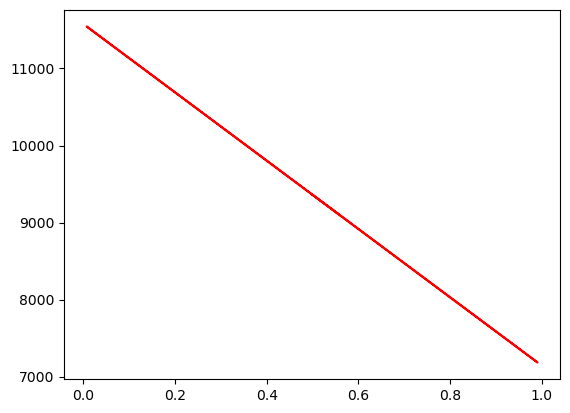

In [312]:
#plt.scatter(data = base_5_100, x = 'Proporção pessoas brancas', y = 'TMIST', s = 1)
plt.plot(base_5_100['Proporção pessoas brancas'], previsoes5, color='red')
plt.show()

<h3> #6 - TMIST (transporte público - pico) ~ Proporção pessoas brancas </h3>

In [303]:
base_6_100 = base_indicadores[(base_indicadores['Maioria populacional'] != 'Área não habitada') & (base_indicadores['Proporção pessoas brancas'] != 0) & (base_indicadores['Proporção pessoas brancas'] != 1) & (base_indicadores['modo_transporte'] == 'transporte público - horário de pico')].nsmallest(round(len(base_indicadores[(base_indicadores['Maioria populacional'] != 'Área não habitada') & (base_indicadores['Proporção pessoas brancas'] != 0) & (base_indicadores['Proporção pessoas brancas'] != 1) & (base_indicadores['modo_transporte'] == 'transporte público - horário de pico')])*1), 'TMIST')

In [298]:
modelo_ajustado6 = sm.ols(formula = "TMIST ~ Q('Proporção pessoas brancas')", data = base_6_100)
modelo_treinado6 = modelo_ajustado6.fit()
modelo_treinado6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TMIST   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     13.07
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           0.000300
Time:                        10:33:02   Log-Likelihood:            -2.7883e+05
No. Observations:               29241   AIC:                         5.577e+05
Df Residuals:                   29239   BIC:                         5.577e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       2201.9100     60.514     36.387      0.000    2083.299    2320.521
Q('Proporção pessoas brancas')  -345.5780     95.585     -3.615      0.000    -532.929    -158.227
==============================================================================
Omnibus:                    58725.497   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        144254872.704
Skew:                          16.718   Prob(JB):                         0.00
Kurtosis:                     345.464   Cond. No.                         6.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [306]:
previsoes6 = modelo_treinado6.predict({'Proporção pessoas brancas' : base_6_100['Proporção pessoas brancas']})

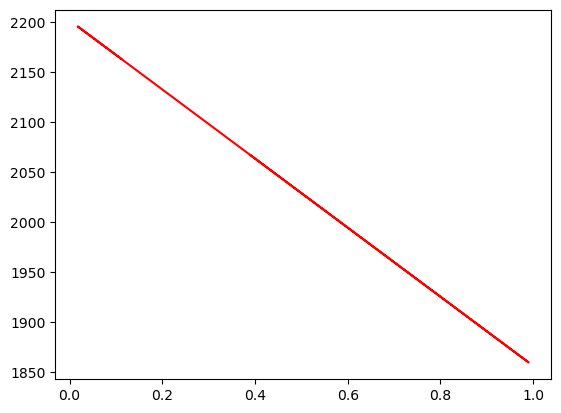

In [310]:
#plt.scatter(data = base_6_100, x = 'Proporção pessoas brancas', y = 'TMIST', s = 1)
plt.plot(base_6_100['Proporção pessoas brancas'], previsoes6, color='red')
plt.show()

<h3> #7 - TMIST (transporte público - não pico) ~ Proporção pessoas brancas </h3>

In [304]:
base_7_100 = base_indicadores[(base_indicadores['Maioria populacional'] != 'Área não habitada') & (base_indicadores['Proporção pessoas brancas'] != 0) & (base_indicadores['Proporção pessoas brancas'] != 1) & (base_indicadores['modo_transporte'] == 'transporte público')].nsmallest(round(len(base_indicadores[(base_indicadores['Maioria populacional'] != 'Área não habitada') & (base_indicadores['Proporção pessoas brancas'] != 0) & (base_indicadores['Proporção pessoas brancas'] != 1) & (base_indicadores['modo_transporte'] == 'transporte público')])*1), 'TMIST')

In [305]:
modelo_ajustado7 = sm.ols(formula = "TMIST ~ Q('Proporção pessoas brancas')", data = base_7_100)
modelo_treinado7 = modelo_ajustado7.fit()
modelo_treinado7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TMIST   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     46.24
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           1.07e-11
Time:                        10:35:57   Log-Likelihood:            -2.8818e+05
No. Observations:               29241   AIC:                         5.764e+05
Df Residuals:                   29239   BIC:                         5.764e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       2664.0203     83.290     31.985      0.000    2500.768    2827.273
Q('Proporção pessoas brancas')  -894.5795    131.561     -6.800      0.000   -1152.445    -636.714
==============================================================================
Omnibus:                    52820.669   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         50150822.264
Skew:                          13.551   Prob(JB):                         0.00
Kurtosis:                     204.066   Cond. No.                         6.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [308]:
previsoes7 = modelo_treinado7.predict({'Proporção pessoas brancas' : base_7_100['Proporção pessoas brancas']})

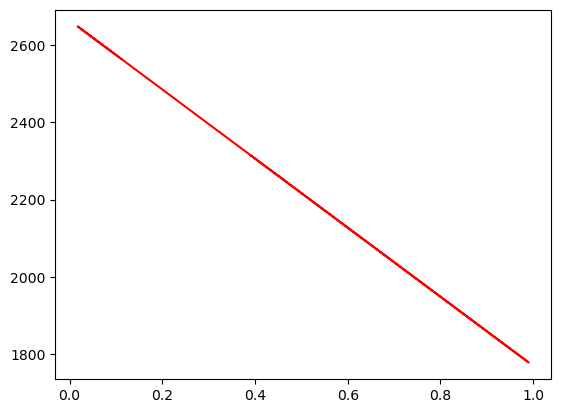

In [311]:
#plt.scatter(data = base_7_100, x = 'Proporção pessoas brancas', y = 'TMIST', s = 1)
plt.plot(base_7_100['Proporção pessoas brancas'], previsoes7, color='red')
plt.show()

<h3> #8 - TMIET (caminhada) ~ Proporção pessoas brancas </h3>

In [333]:
base_8_100 = base_indicadores[(base_indicadores['Maioria populacional'] != 'Área não habitada') & (base_indicadores['Proporção pessoas brancas'] != 0) & (base_indicadores['Proporção pessoas brancas'] != 1) & (base_indicadores['modo_transporte'] == 'caminhada')].nsmallest(round(len(base_indicadores[(base_indicadores['Maioria populacional'] != 'Área não habitada') & (base_indicadores['Proporção pessoas brancas'] != 0) & (base_indicadores['Proporção pessoas brancas'] != 1) & (base_indicadores['modo_transporte'] == 'caminhada')])*1), 'TMIET')

In [314]:
modelo_ajustado8 = sm.ols(formula = "TMIET ~ Q('Proporção pessoas brancas')", data = base_8_100)
modelo_treinado8 = modelo_ajustado8.fit()
modelo_treinado8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TMIET   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     154.9
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           1.66e-35
Time:                        10:50:47   Log-Likelihood:            -6.8243e+05
No. Observations:               60955   AIC:                         1.365e+06
Df Residuals:                   60953   BIC:                         1.365e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       8265.8078    183.695     44.997      0.000    7905.765    8625.851
Q('Proporção pessoas brancas') -4161.3432    334.404    -12.444      0.000   -4816.777   -3505.910
==============================================================================
Omnibus:                    41655.339   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           368721.266
Skew:                           3.434   Prob(JB):                         0.00
Kurtosis:                      12.899   Cond. No.                         5.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [315]:
previsoes8 = modelo_treinado8.predict({'Proporção pessoas brancas' : base_8_100['Proporção pessoas brancas']})

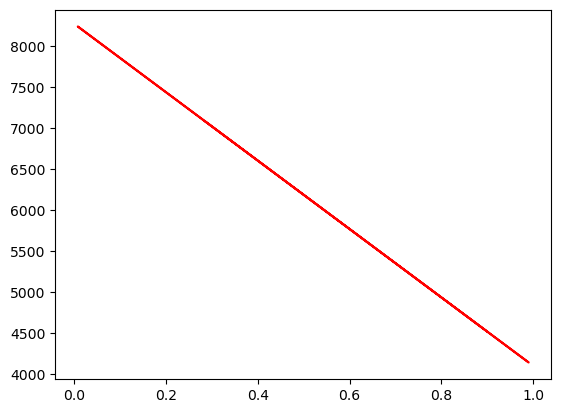

In [316]:
#plt.scatter(data = base_8_100, x = 'Proporção pessoas brancas', y = 'TMIET', s = 1)
plt.plot(base_8_100['Proporção pessoas brancas'], previsoes8, color='red')
plt.show()

<h3> #9 - TMIET (Transporte público - pico) ~ Proporção pessoas brancas </h3>

In [334]:
base_9_100 = base_indicadores[(base_indicadores['Maioria populacional'] != 'Área não habitada') & (base_indicadores['Proporção pessoas brancas'] != 0) & (base_indicadores['Proporção pessoas brancas'] != 1) & (base_indicadores['modo_transporte'] == 'transporte público - horário de pico')].nsmallest(round(len(base_indicadores[(base_indicadores['Maioria populacional'] != 'Área não habitada') & (base_indicadores['Proporção pessoas brancas'] != 0) & (base_indicadores['Proporção pessoas brancas'] != 1) & (base_indicadores['modo_transporte'] == 'transporte público - horário de pico')])*1), 'TMIET')

In [335]:
modelo_ajustado9 = sm.ols(formula = "TMIET ~ Q('Proporção pessoas brancas')", data = base_9_100)
modelo_treinado9 = modelo_ajustado9.fit()
modelo_treinado9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TMIET   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7349
Date:                Wed, 25 Jan 2023   Prob (F-statistic):              0.391
Time:                        11:25:32   Log-Likelihood:            -2.7714e+05
No. Observations:               29241   AIC:                         5.543e+05
Df Residuals:                   29239   BIC:                         5.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       1466.1039     57.105     25.674      0.000    1354.175    1578.032
Q('Proporção pessoas brancas')   -77.3255     90.200     -0.857      0.391    -254.122      99.471
==============================================================================
Omnibus:                    61962.682   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        210131955.429
Skew:                          18.833   Prob(JB):                         0.00
Kurtosis:                     416.582   Cond. No.                         6.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [341]:
previsoes9 = modelo_treinado9.predict({'Proporção pessoas brancas' : base_9_100['Proporção pessoas brancas']})

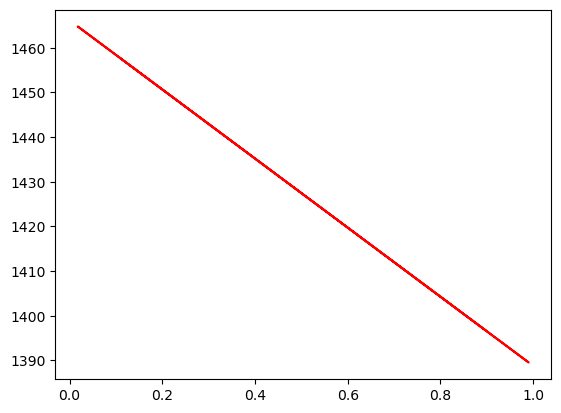

In [345]:
#plt.scatter(data = base_9_100, x = 'Proporção pessoas brancas', y = 'TMIET', s = 1)
plt.plot(base_9_100['Proporção pessoas brancas'], previsoes9, color='red')
plt.show()

<h3> #10 - TMIET (Transporte público - não pico) ~ Proporção pessoas brancas </h3>

In [338]:
base_10_100 = base_indicadores[(base_indicadores['Maioria populacional'] != 'Área não habitada') & (base_indicadores['Proporção pessoas brancas'] != 0) & (base_indicadores['Proporção pessoas brancas'] != 1) & (base_indicadores['modo_transporte'] == 'transporte público')].nsmallest(round(len(base_indicadores[(base_indicadores['Maioria populacional'] != 'Área não habitada') & (base_indicadores['Proporção pessoas brancas'] != 0) & (base_indicadores['Proporção pessoas brancas'] != 1) & (base_indicadores['modo_transporte'] == 'transporte público')])*1), 'TMIET')

In [339]:
modelo_ajustado10 = sm.ols(formula = "TMIET ~ Q('Proporção pessoas brancas')", data = base_10_100)
modelo_treinado10 = modelo_ajustado10.fit()
modelo_treinado10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TMIET   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     38.73
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           4.92e-10
Time:                        11:28:07   Log-Likelihood:            -2.8579e+05
No. Observations:               29241   AIC:                         5.716e+05
Df Residuals:                   29239   BIC:                         5.716e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       1986.5811     76.768     25.878      0.000    1836.111    2137.051
Q('Proporção pessoas brancas')  -754.6699    121.260     -6.224      0.000    -992.344    -516.996
==============================================================================
Omnibus:                    55694.849   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         74702765.423
Skew:                          15.091   Prob(JB):                         0.00
Kurtosis:                     248.769   Cond. No.                         6.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [342]:
previsoes10 = modelo_treinado10.predict({'Proporção pessoas brancas' : base_10_100['Proporção pessoas brancas']})

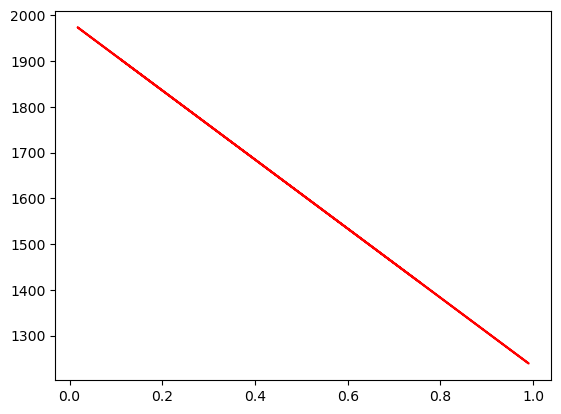

In [347]:
#plt.scatter(data = base_10_100, x = 'Proporção pessoas brancas', y = 'TMIET', s = 1)
plt.plot(base_10_100['Proporção pessoas brancas'], previsoes10, color='red')
plt.show()

<h3> #11 - CMATT15 (caminhada) ~ Proporção pessoas brancas </h3>

In [358]:
base_11_100 = base_indicadores[(base_indicadores['Maioria populacional'] != 'Área não habitada') & (base_indicadores['Proporção pessoas brancas'] != 0) & (base_indicadores['Proporção pessoas brancas'] != 1) & (base_indicadores['modo_transporte'] == 'caminhada')].nsmallest(round(len(base_indicadores[(base_indicadores['Maioria populacional'] != 'Área não habitada') & (base_indicadores['Proporção pessoas brancas'] != 0) & (base_indicadores['Proporção pessoas brancas'] != 1) & (base_indicadores['modo_transporte'] == 'caminhada')])*1), 'CMATT15')

In [352]:
modelo_ajustado11 = sm.ols(formula = "CMATT15 ~ Q('Proporção pessoas brancas')", data = base_11_100)
modelo_treinado11 = modelo_ajustado11.fit()
modelo_treinado11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CMATT15   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1321.
Date:                Wed, 25 Jan 2023   Prob (F-statistic):          4.30e-286
Time:                        11:32:31   Log-Likelihood:                -63881.
No. Observations:               60955   AIC:                         1.278e+05
Df Residuals:                   60953   BIC:                         1.278e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.0570      0.007      7.925      0.000       0.043       0.071
Q('Proporção pessoas brancas')     0.4760      0.013     36.341      0.000       0.450       0.502
==============================================================================
Omnibus:                    71112.241   Durbin-Watson:                   0.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9317017.217
Skew:                           6.153   Prob(JB):                         0.00
Kurtosis:                      62.304   Cond. No.                         5.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [353]:
previsoes11 = modelo_treinado11.predict({'Proporção pessoas brancas' : base_11_100['Proporção pessoas brancas']})

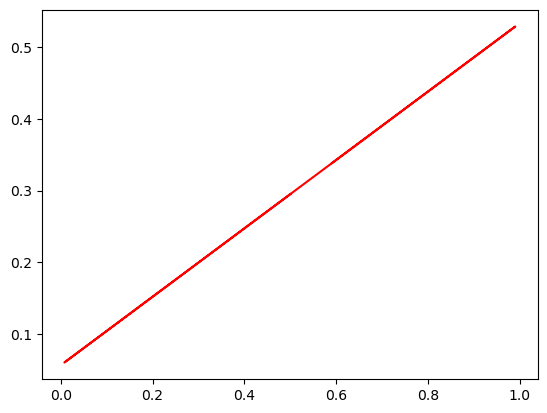

In [355]:
#plt.scatter(data = base_11_100, x = 'Proporção pessoas brancas', y = 'CMATT15', s = 1)
plt.plot(base_11_100['Proporção pessoas brancas'], previsoes11, color='red')
plt.show()

<h1> Testes de hipótese para amostras independetes </h1>

<h3> #1 - Teste Z - TMISA faixa (caminhada) vs Maioria populacional </h3>

In [365]:
base_indicadores['TMISA faixa'].unique()

array(['De 1 hora e 30 min a 1 hora e 45 min', 'Mais de 2 horas',
       'De 30 a 45 min', 'De 15 a 30 min', 'De 1 hora a 1 hora e 15 min',
       'De 1 hora e 15 min a 1 hora e 30 min', 'De 45 a 60 min',
       'Menos de 15 min'], dtype=object)

In [444]:
teste_z_1 = pd.DataFrame()

In [445]:
teste_z_1.loc[:, 'TMISA faixa'] = ['Menos de 15 min', 'De 15 a 30 min', 'De 30 a 45 min', 'De 45 a 60 min', 'De 1 hora a 1 hora e 15 min', 'De 1 hora e 15 min a 1 hora e 30 min', 'De 1 hora e 30 min a 1 hora e 45 min', 'De 1 hora e 45 min a 2 horas', 'Mais de 2 horas']

In [446]:
teste_z_1.loc[:, 'Total de áreas habitadas: maioria não branca (n1)'] = len(base_indicadores[base_indicadores['Maioria populacional'] == 'Maioria não branca']['Maioria populacional'])
teste_z_1.loc[:, 'Total de áreas habitadas: maioria branca (n2)'] = len(base_indicadores[base_indicadores['Maioria populacional'] == 'Maioria branca']['Maioria populacional'])

In [447]:
teste_z_1.loc[:, 'Áreas maioria não branca'] = [len(base_indicadores[(base_indicadores['TMISA faixa'] == teste_z_1['TMISA faixa'][i]) & (base_indicadores['Maioria populacional'] == 'Maioria não branca')]['TMISA faixa']) for i in range(len(teste_z_1))]
teste_z_1.loc[:, 'Áreas maioria branca'] = [len(base_indicadores[(base_indicadores['TMISA faixa'] == teste_z_1['TMISA faixa'][i]) & (base_indicadores['Maioria populacional'] == 'Maioria branca')]['TMISA faixa']) for i in range(len(teste_z_1))]

In [448]:
teste_z_1.loc[:, 'Proporção de áreas maioria não branca (p1)'] = [teste_z_1['Áreas maioria não branca'][i]/teste_z_1['Total de áreas habitadas: maioria não branca (n1)'][i] for i in range(len(teste_z_1))]
teste_z_1.loc[:, 'Proporção de áreas maioria branca (p2)'] = [teste_z_1['Áreas maioria branca'][i]/teste_z_1['Total de áreas habitadas: maioria branca (n2)'][i] for i in range(len(teste_z_1))]

In [451]:
teste_z_1.loc[:, ['z','p']] = [proportions_ztest([teste_z_1['Áreas maioria não branca'][i], teste_z_1['Áreas maioria branca'][i]], 
                                                 [teste_z_1['Total de áreas habitadas: maioria não branca (n1)'][i], teste_z_1['Total de áreas habitadas: maioria branca (n2)'][i]], alternative = 'two-sided') 
                               for i in range(len(teste_z_1))]

C:\Users\lucas\anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:790: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std


In [452]:
teste_z_1

,TMISA faixa,Total de áreas habitadas: maioria não branca (n1),Total de áreas habitadas: maioria branca (n2),Áreas maioria não branca,Áreas maioria branca,Proporção de áreas maioria não branca (p1),Proporção de áreas maioria branca (p2),z,p
0,Menos de 15 min,92154,90594,4779,9293,0.051859,0.102579,-40.663540,0.000000e+00
1,De 15 a 30 min,92154,90594,10687,15430,0.115969,0.170320,-33.192765,1.369108e-241
2,De 30 a 45 min,92154,90594,11380,14882,0.123489,0.164271,-24.848747,2.667753e-136
3,De 45 a 60 min,92154,90594,10834,12475,0.117564,0.137702,-12.903117,4.322509e-38
4,De 1 hora a 1 hora e 15 min,92154,90594,9523,9192,0.103338,0.101464,1.321273,1.864102e-01
5,De 1 hora e 15 min a 1 hora e 30 min,92154,90594,7610,6087,0.082579,0.067190,12.491939,8.261529e-36
6,De 1 hora e 30 min a 1 hora e 45 min,92154,90594,5434,4129,0.058967,0.045577,12.851288,8.458977e-38
7,De 1 hora e 45 min a 2 horas,92154,90594,0,0,0.000000,0.000000,NaN,NaN
8,Mais de 2 horas,92154,90594,31907,19106,0.346236,0.210897,64.485793,0.000000e+00


<h3> #2 - Teste Z - TMIST faixa (caminhada) vs Maioria populacional </h3>

In [453]:
teste_z_2 = pd.DataFrame()

In [464]:
teste_z_2.loc[:, 'TMIST faixa'] = ['Menos de 15 min', 'De 15 a 30 min', 'De 30 a 45 min', 'De 45 a 60 min', 'De 1 hora a 1 hora e 15 min', 'De 1 hora e 15 min a 1 hora e 30 min', 'De 1 hora e 30 min a 1 hora e 45 min', 'De 1 hora e 45 min a 2 horas', 'Mais de 2 horas']

In [465]:
teste_z_2.loc[:, 'Total de áreas habitadas: maioria não branca (n1)'] = len(base_indicadores[base_indicadores['Maioria populacional'] == 'Maioria não branca']['Maioria populacional'])
teste_z_2.loc[:, 'Total de áreas habitadas: maioria branca (n2)'] = len(base_indicadores[base_indicadores['Maioria populacional'] == 'Maioria branca']['Maioria populacional'])

In [456]:
teste_z_2.loc[:, 'Áreas maioria não branca'] = [len(base_indicadores[(base_indicadores['TMIST faixa'] == teste_z_2['TMIST faixa'][i]) & (base_indicadores['Maioria populacional'] == 'Maioria não branca')]['TMIST faixa']) for i in range(len(teste_z_2))]
teste_z_2.loc[:, 'Áreas maioria branca'] = [len(base_indicadores[(base_indicadores['TMIST faixa'] == teste_z_2['TMIST faixa'][i]) & (base_indicadores['Maioria populacional'] == 'Maioria branca')]['TMIST faixa']) for i in range(len(teste_z_2))]

In [457]:
teste_z_2.loc[:, 'Proporção de áreas maioria não branca (p1)'] = [teste_z_2['Áreas maioria não branca'][i]/teste_z_2['Total de áreas habitadas: maioria não branca (n1)'][i] for i in range(len(teste_z_2))]
teste_z_2.loc[:, 'Proporção de áreas maioria branca (p2)'] = [teste_z_2['Áreas maioria branca'][i]/teste_z_2['Total de áreas habitadas: maioria branca (n2)'][i] for i in range(len(teste_z_2))]

In [458]:
teste_z_2.loc[:, ['z','p']] = [proportions_ztest([teste_z_2['Áreas maioria não branca'][i], teste_z_2['Áreas maioria branca'][i]], 
                                                 [teste_z_2['Total de áreas habitadas: maioria não branca (n1)'][i], teste_z_2['Total de áreas habitadas: maioria branca (n2)'][i]], alternative = 'two-sided') 
                               for i in range(len(teste_z_2))]

C:\Users\lucas\anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:790: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std


In [459]:
teste_z_2

,TMIST faixa,Total de áreas habitadas: maioria não branca (n1),Total de áreas habitadas: maioria branca (n2),Áreas maioria não branca,Áreas maioria branca,Proporção de áreas maioria não branca (p1),Proporção de áreas maioria branca (p2),z,p
0,Menos de 15 min,92154,90594,31004,32163,0.336437,0.355024,-8.353311,6.637530e-17
1,De 15 a 30 min,92154,90594,27855,28650,0.302266,0.316246,-6.465523,1.009490e-10
2,De 30 a 45 min,92154,90594,13579,14310,0.147351,0.157957,-6.303948,2.901571e-10
3,De 45 a 60 min,92154,90594,6897,5742,0.074842,0.063382,9.654151,4.720533e-22
4,De 1 hora a 1 hora e 15 min,92154,90594,3831,3101,0.041572,0.034230,8.214736,2.126323e-16
5,De 1 hora e 15 min a 1 hora e 30 min,92154,90594,2125,1846,0.023059,0.020377,3.932634,8.402009e-05
6,De 1 hora e 30 min a 1 hora e 45 min,92154,90594,1238,1218,0.013434,0.013445,-0.019610,9.843542e-01
7,De 1 hora e 45 min a 2 horas,92154,90594,0,0,0.000000,0.000000,NaN,NaN
8,Mais de 2 horas,92154,90594,5625,3564,0.061039,0.039340,21.223191,5.832814e-100


<h3> #3 - Teste Z - TMIET faixa (caminhada) vs Maioria populacional </h3>

In [467]:
teste_z_3 = pd.DataFrame()

In [468]:
teste_z_3.loc[:, 'TMIET faixa'] = ['Menos de 15 min', 'De 15 a 30 min', 'De 30 a 45 min', 'De 45 a 60 min', 'De 1 hora a 1 hora e 15 min', 'De 1 hora e 15 min a 1 hora e 30 min', 'De 1 hora e 30 min a 1 hora e 45 min', 'De 1 hora e 45 min a 2 horas', 'Mais de 2 horas']

In [469]:
teste_z_3.loc[:, 'Total de áreas habitadas: maioria não branca (n1)'] = len(base_indicadores[base_indicadores['Maioria populacional'] == 'Maioria não branca']['Maioria populacional'])
teste_z_3.loc[:, 'Total de áreas habitadas: maioria branca (n2)'] = len(base_indicadores[base_indicadores['Maioria populacional'] == 'Maioria branca']['Maioria populacional'])

In [470]:
teste_z_3.loc[:, 'Áreas maioria não branca'] = [len(base_indicadores[(base_indicadores['TMIET faixa'] == teste_z_2['TMIET faixa'][i]) & (base_indicadores['Maioria populacional'] == 'Maioria não branca')]['TMIET faixa']) for i in range(len(teste_z_3))]
teste_z_3.loc[:, 'Áreas maioria branca'] = [len(base_indicadores[(base_indicadores['TMIET faixa'] == teste_z_2['TMIET faixa'][i]) & (base_indicadores['Maioria populacional'] == 'Maioria branca')]['TMIET faixa']) for i in range(len(teste_z_3))]

In [471]:
teste_z_3.loc[:, 'Proporção de áreas maioria não branca (p1)'] = [teste_z_3['Áreas maioria não branca'][i]/teste_z_3['Total de áreas habitadas: maioria não branca (n1)'][i] for i in range(len(teste_z_3))]
teste_z_3.loc[:, 'Proporção de áreas maioria branca (p2)'] = [teste_z_3['Áreas maioria branca'][i]/teste_z_3['Total de áreas habitadas: maioria branca (n2)'][i] for i in range(len(teste_z_3))]

In [472]:
teste_z_3.loc[:, ['z','p']] = [proportions_ztest([teste_z_3['Áreas maioria não branca'][i], teste_z_3['Áreas maioria branca'][i]], 
                                                 [teste_z_3['Total de áreas habitadas: maioria não branca (n1)'][i], teste_z_3['Total de áreas habitadas: maioria branca (n2)'][i]], alternative = 'two-sided') 
                               for i in range(len(teste_z_3))]

C:\Users\lucas\anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:790: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std


In [473]:
teste_z_3

,TMIET faixa,Total de áreas habitadas: maioria não branca (n1),Total de áreas habitadas: maioria branca (n2),Áreas maioria não branca,Áreas maioria branca,Proporção de áreas maioria não branca (p1),Proporção de áreas maioria branca (p2),z,p
0,Menos de 15 min,92154,90594,47433,47518,0.514714,0.524516,-4.193096,2.751723e-05
1,De 15 a 30 min,92154,90594,23952,25720,0.259913,0.283904,-11.526048,9.751807e-31
2,De 30 a 45 min,92154,90594,8596,8135,0.093279,0.089796,2.580926,9.853559e-03
3,De 45 a 60 min,92154,90594,3997,3683,0.043373,0.040654,2.896551,3.772893e-03
4,De 1 hora a 1 hora e 15 min,92154,90594,2143,1971,0.023255,0.021756,2.158602,3.088104e-02
5,De 1 hora e 15 min a 1 hora e 30 min,92154,90594,1491,986,0.016179,0.010884,9.788854,1.257123e-22
6,De 1 hora e 30 min a 1 hora e 45 min,92154,90594,857,590,0.009300,0.006513,6.721217,1.802135e-11
7,De 1 hora e 45 min a 2 horas,92154,90594,0,0,0.000000,0.000000,NaN,NaN
8,Mais de 2 horas,92154,90594,3685,1991,0.039987,0.021977,22.189958,4.293954e-109


<h3> #4 - Teste Z - Renda domiciliar per capta vs Maioria populacional </h3>

In [492]:
teste_z_4 = pd.DataFrame(columns = ['z', 'p'], 
                                   data = [ztest(base[(base['Maioria populacional'] != 'Área não habitada') & (base['Proporção pessoas brancas'] != 0) & (base['Proporção pessoas brancas'] != 1) & (base['Maioria populacional'] == 'Maioria não branca')]['renda_domiciliar_pc'],
                                                base[(base['Maioria populacional'] != 'Área não habitada') & (base['Proporção pessoas brancas'] != 0) & (base['Proporção pessoas brancas'] != 1) & (base['Maioria populacional'] == 'Maioria branca')]['renda_domiciliar_pc'])])

In [493]:
teste_z_4

,z,p
0,-99.675738,0.0


<h3> #5 - Teste Z - Variação percentual em relação à renda domiciliar pc média do município vs Maioria populacional </h3>

In [494]:
teste_z_5 = ztest(base[(base['Maioria populacional'] != 'Área não habitada') & (base['Proporção pessoas brancas'] != 0) & (base['Proporção pessoas brancas'] != 1) & (base['Maioria populacional'] == 'Maioria não branca')]['Variação percentual em relação à renda domiciliar pc média do município'],
      base[(base['Maioria populacional'] != 'Área não habitada') & (base['Proporção pessoas brancas'] != 0) & (base['Proporção pessoas brancas'] != 1) & (base['Maioria populacional'] == 'Maioria branca')]['Variação percentual em relação à renda domiciliar pc média do município'])

In [495]:
teste_z_5 = pd.DataFrame(columns = ['z', 'p'], 
                                   data = [ztest(base[(base['Maioria populacional'] != 'Área não habitada') & (base['Proporção pessoas brancas'] != 0) & (base['Proporção pessoas brancas'] != 1) & (base['Maioria populacional'] == 'Maioria não branca')]['Variação percentual em relação à renda domiciliar pc média do município'],
                                                 base[(base['Maioria populacional'] != 'Área não habitada') & (base['Proporção pessoas brancas'] != 0) & (base['Proporção pessoas brancas'] != 1) & (base['Maioria populacional'] == 'Maioria branca')]['Variação percentual em relação à renda domiciliar pc média do município'])])

In [487]:
resultado_teste_z_5

,z,p
0,-64.103263,0.0


<h1> Exportação dos resultados </h1>

In [496]:
for i in range(5):
    globals()['teste_z_' + str(i+1)].to_csv(r'C:\Users\lucas\Desktop\Bases de Dados Estudos\Acesso a oportunidades\teste_z_' + str(i+1) + '.csv', sep=';', decimal=',')